# The Science of the Starship Titanic

##### **Team 11**: Adith Vikrant Pai, Honomi Fujii, Yasuhito Morimoto, Yayoi Kurihara, Yoshiyuki Watabe, Yasuhiro Mizoguchi

# Contents

## 1. Introduction
## 2. Analyze by describing data
## 3. Data cleaning
## 4. EDA
## 5. Feature Engineering
## 6. Preprocessing
## 7. Models
## 8. Actionable Insights
## 9. Conclusion
## 10. Bibliography


## 1. Introduction

- The exploration of the universe has always been shrouded in mystery, and the power of data science is essential to its unraveling. 2,912, the spacecraft Titanic experienced a serious space-time anomaly that resulted in passengers being transported to another dimension.

- The objective of this analysis is to understand under what conditions the transfer to the other dimension occurred and to identify the passengers who were transferred. To achieve this objective, data recovered from the damaged computer system will be analyzed to attempt to identify patterns and trends.

- The dataset includes personal records of approximately 8,700 passengers as training data, which we will use to build predictive models. We will also use information from the remaining approximately 4,300 passengers, provided as test data, to evaluate the performance of the model.

## 2. Analyze by describing data

- The distribution of 20 to 30 is the biggest with a small peak at 0-5 years of age.
- The majority did not use the service at all, while a small minority pay a large amount for the service.
- The passengers from Earth is about twice as other homeplanet (Europa, Mars)
- The number of cryosleep people is about half of the number of non-cryosleep people.
- The number of people whose destination is TRAPPIST-1e are the most,followed by 55Cancrie and PSO J318.5-22
- The VIP people are very few.
- The percentage of transportation and non-transportation is almost the same. 

In [408]:
import pandas as pd
import numpy as np
import random as rnd
from scipy import stats
from pathlib import Path

import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [409]:
datapath = Path('data')
train_df = pd.read_csv(datapath / Path('train.csv'))
test_df = pd.read_csv(datapath / Path('test.csv'))
combine = [train_df, test_df]

In [410]:
print(train_df.columns.values)

['PassengerId' 'HomePlanet' 'CryoSleep' 'Cabin' 'Destination' 'Age' 'VIP'
 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck' 'Name'
 'Transported']


In [411]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [412]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


The function reveals the first five entries of the dataset. This dataset appears to describe passengers, with columns indicating various attributes such as PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP status, and expenditures across different services like RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck. The Name column contains the passenger's name, and the Transported column indicates a boolean value which could represent whether the passenger was transported to the destination or not. It seems to be a structured dataset that could be used for exploratory data analysis, feature engineering, or predictive modeling, possibly to predict the Transported status.

In [413]:
train_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [414]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [415]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [416]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 colu

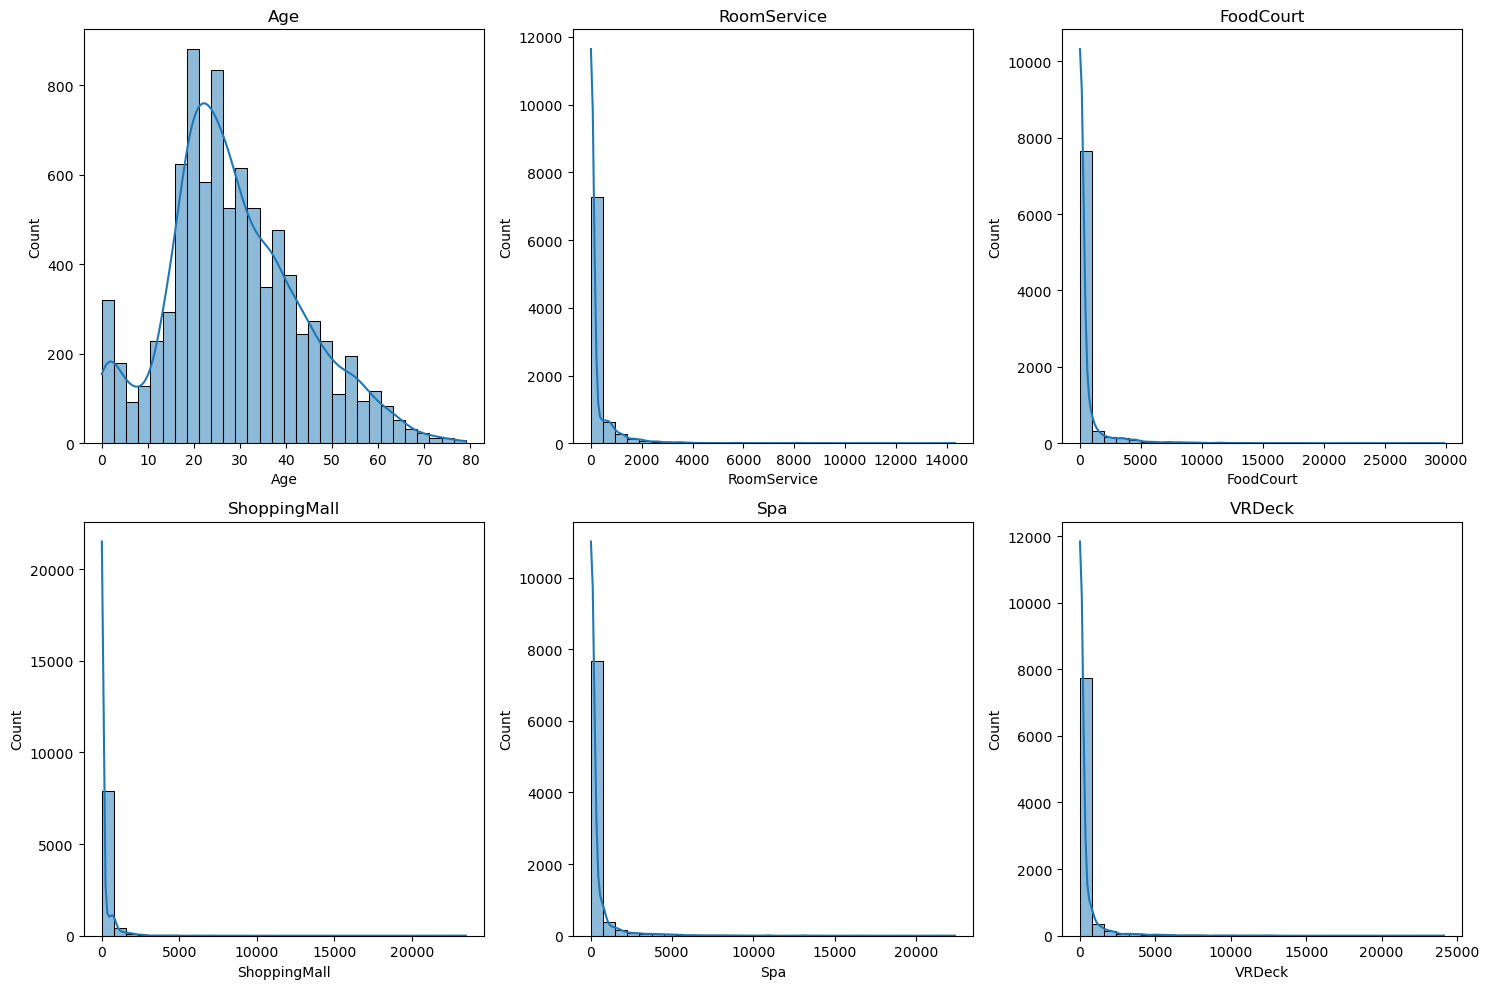

In [417]:
# Display the distribution of the numerical variables
num_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

plt.figure(figsize=(15, 10))
for i, column in enumerate(num_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_df[column], kde=True, bins=30)
    plt.title(column)

plt.tight_layout()
plt.show()

These graphs show the distribution of numerical variables (Age, services). The 'Age' distribution relatively represented normall distribution with a slight right skew, indicating a younger people demographic with fewer elderly passengers. The service categories, which include 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', and 'VRDeck', all display highly skewed distributions with the majority of counts close to zero. It suggests that most passengers either do not spend money in these areas or spend very small amounts and there are a few passengers who spend significantly larger amounts. It could indicate a minority of wealthier passengers or outliers. 

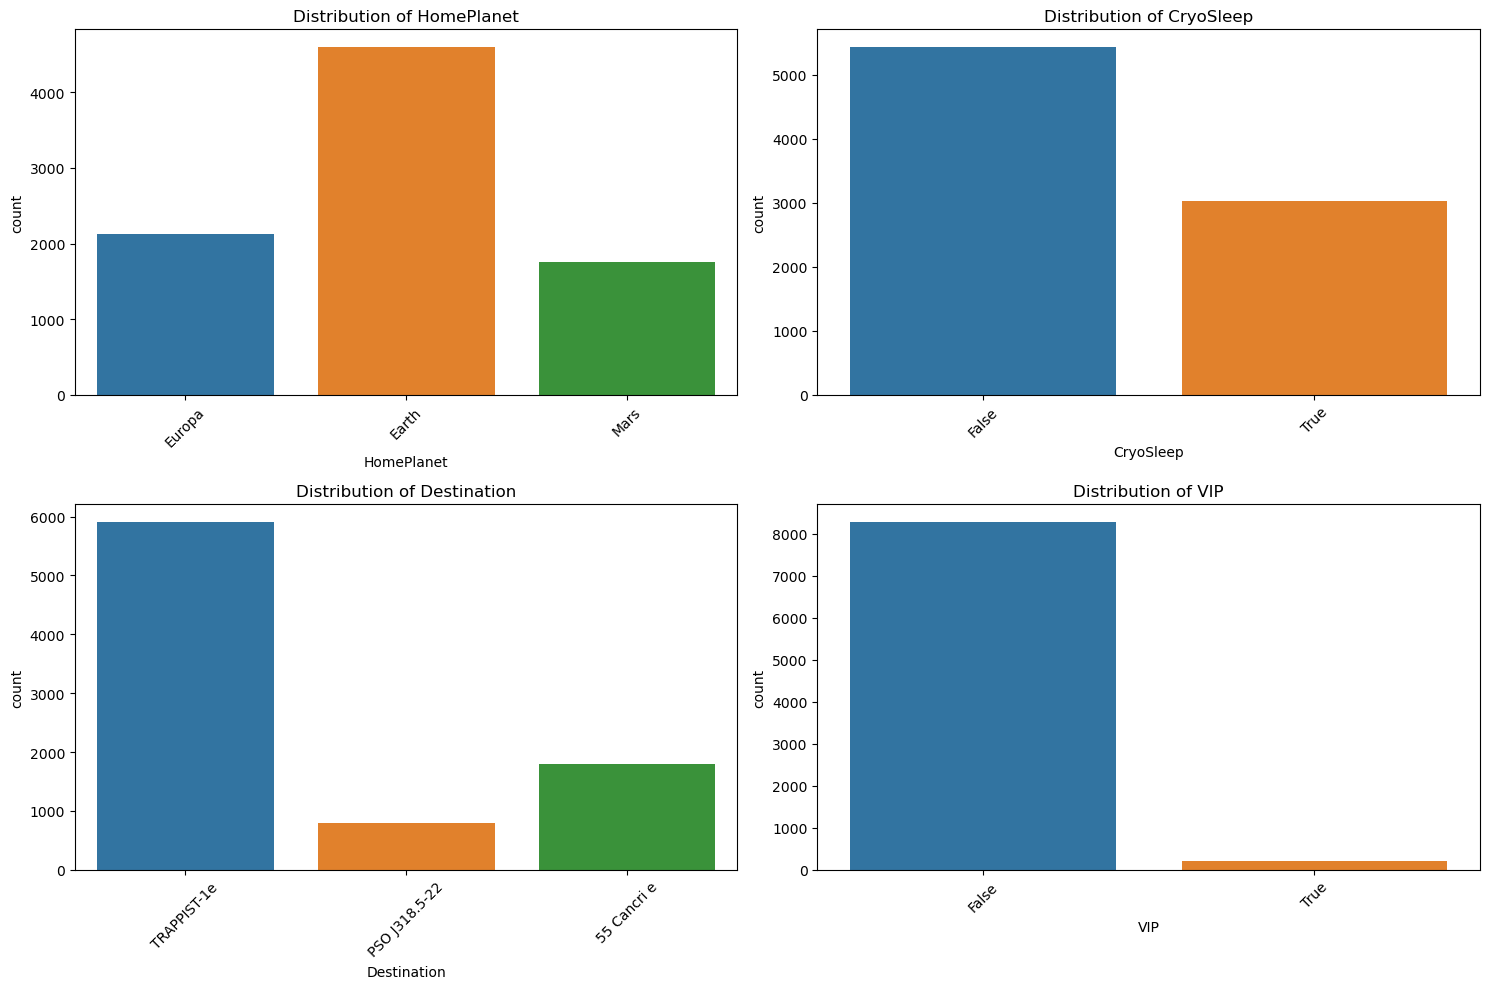

In [418]:
# Display the distribution of the categorical variables
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column, data=train_df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

These graphs show the distribution of passengers by HomePlanet, CryoSleep status, Destination, and VIP status (categorical variables). The majority of passengers are from Earth, followed by Europa and Mars. It suggests that Earth may be the most populous or most commonly departed planet. The number of cryosleep people is about half of the number of non-cryosleep people, suggesting that CryoSleep may not that rare an option. The destination most passengers are headed to is TRAPPIST-1e, with 55 Cancri e and PSO J318.5-22 being less frequent, which could reflect either preference or each population size. Lastly, very few passengers have VIP status, which implies that wealthy people are not on board or that the definition of VIP is unusually high.

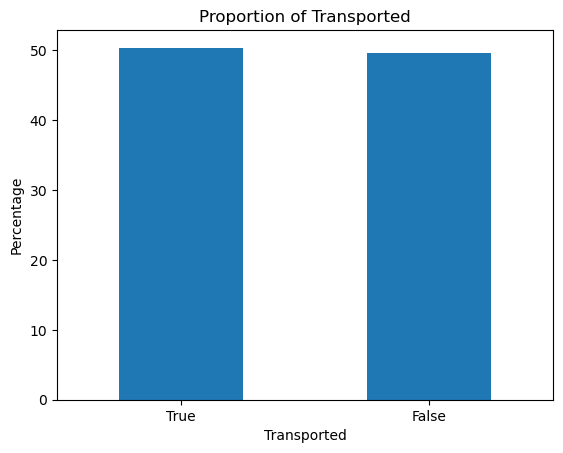

In [419]:
# Display the distribution of transported
transported_counts = train_df['Transported'].value_counts(normalize=True) * 100

transported_counts.plot(kind='bar')
plt.title('Proportion of Transported')
plt.xlabel('Transported')
plt.ylabel('Percentage')
plt.xticks(rotation=0) 


plt.show()

In [420]:
train_df[['Cabin', 'Name']].describe()

,Cabin,Name
count,8494,8493
unique,6560,8473
top,G/734/S,Gollux Reedall
freq,8,2


The percentage of transportation and non-transportation is almost the same. The lack of extreme differences in the number of both data(true/false) of objective variables may reduce bias in examining relationships with other variables. 
The Cabin column has a high number of unique entries (6,560), indicating a wide variety of cabins, but the most common cabin is G/734/S, occupied by 8 passengers. It suggest that there was never a concentration of people in a particular place where they stayed. The Name column has 8473 unique names with the name Gollux Reedall appearing twice, which is very low frequency indicating the dataset contains mostly unique names. 

## 3. Data cleaning
- For the treatment of null data, medians were applied to categorical variables and means were applied to numerical variables.

In [421]:
for dataset in combine:    
    dataset['HomePlanet'].fillna(dataset['HomePlanet'].mode()[0],inplace = True)
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['CryoSleep'].fillna(dataset['CryoSleep'].mode()[0],inplace = True)
    dataset['Destination'].fillna(dataset['Destination'].mode()[0],inplace = True)
    dataset['VIP'].fillna(dataset['VIP'].mode()[0],inplace = True)
    dataset['RoomService'].fillna(dataset['RoomService'].median(), inplace = True)
    dataset['FoodCourt'].fillna(dataset['FoodCourt'].median(), inplace = True)
    dataset['ShoppingMall'].fillna(dataset['ShoppingMall'].median(), inplace = True)
    dataset['Spa'].fillna(dataset['Spa'].median(), inplace = True)
    dataset['VRDeck'].fillna(dataset['VRDeck'].median(), inplace = True)

In [422]:
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [423]:
test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

## 4. EDA
- From the basic analysis, the factors that seemed to have a strong relationship with transported were passengers not using the service, passengers who were cryosleeping, passengers from Europa, and children under 15 years old. 

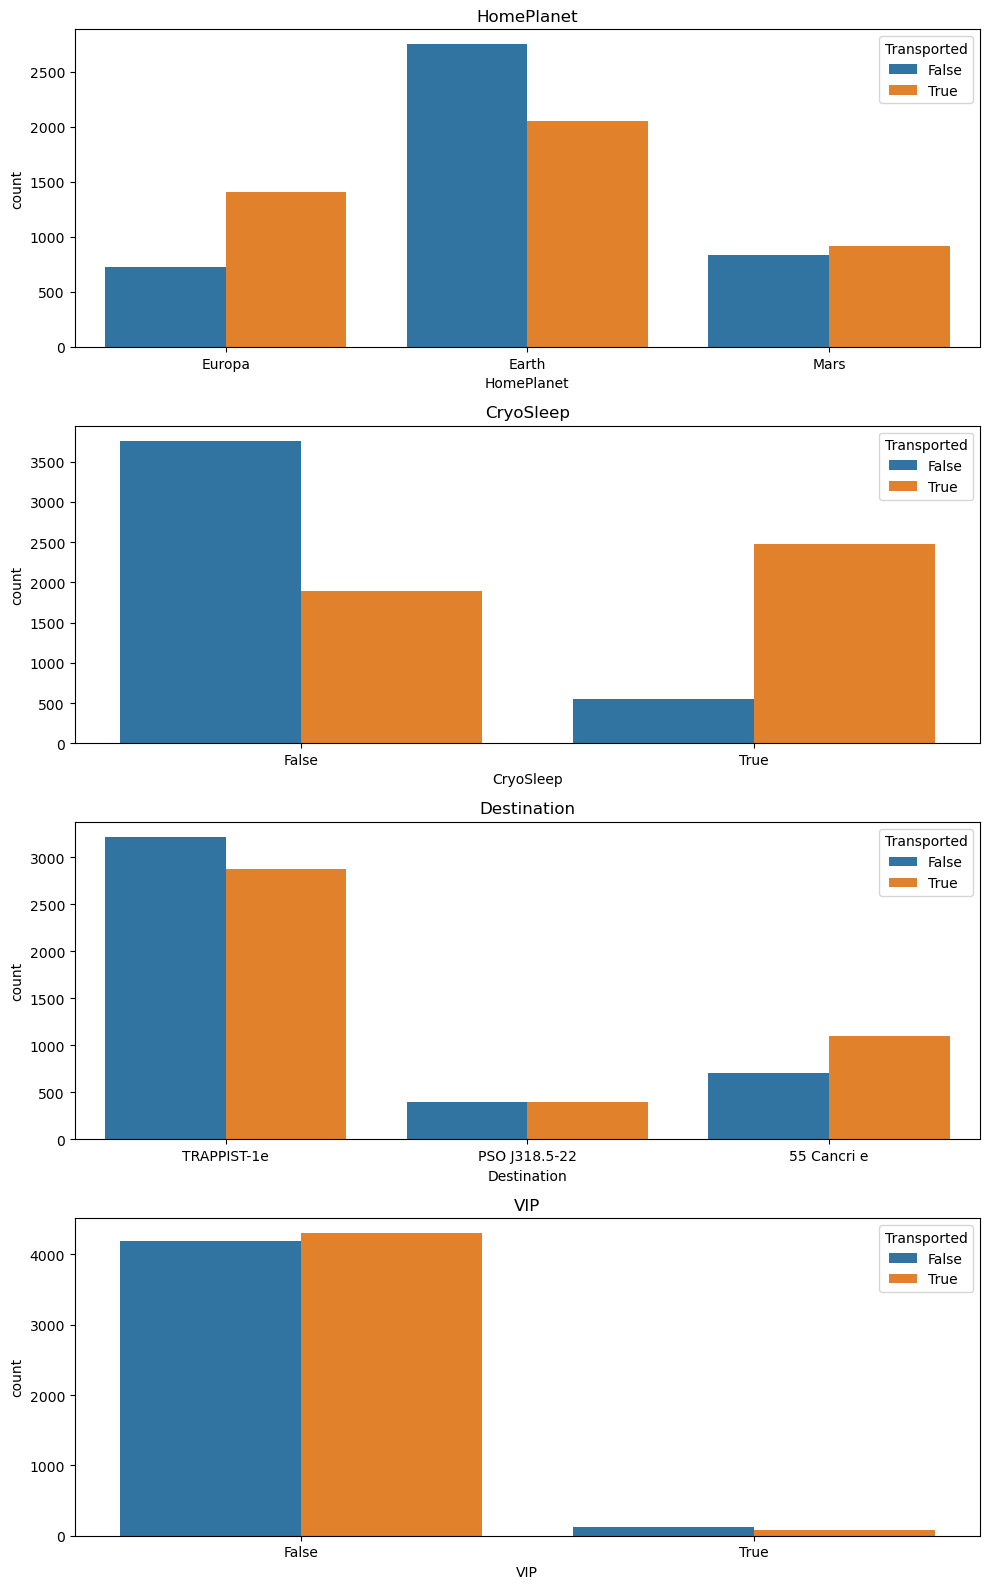

In [424]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train_df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

Looking at the chances of individuals going on a space journey, several interesting patterns emerge. People from Europa seem to have a higher proportion of being transported to another dimention compared to those from Earth or Mars. There is a tendency that taking a nap in CryoSleep, significantly boosts the proportion of being transported compared to others. The destination plays a role too; a well-known planet like TRAPPIST-1e has more passengers who were transported than others. Interestingly, being a VIP doesn't make much of a difference in this process. So, it appears that where you're coming from and if you opt for CryoSleep might be key factors for being transported to other dimentions.Specific proportions of transported by each factors are as follows.

In [425]:
train_df[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.427649


In [426]:
train_df = pd.get_dummies(train_df, columns = ['HomePlanet'])
train_df.head()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,True,False
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,False,False
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,True,False
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,True,False
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,False,False


In [427]:
test_df = pd.get_dummies(test_df,columns = ['HomePlanet'])
combine = [train_df,test_df]
train_df.head()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,True,False
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,False,False
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,True,False
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,True,False
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,False,False


In [428]:
train_df[["Destination", "Transported"]].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.472199


In [429]:
train_df = pd.get_dummies(train_df,columns = ['Destination'])
test_df = pd.get_dummies(test_df,columns = ['Destination'])
combine = [train_df,test_df]
train_df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,True,False,False,False,True
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,False,False,False,False,True
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,True,False,False,False,True
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,True,False,False,False,True
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,False,False,False,False,True


In [430]:
train_df[["VIP", "Transported"]].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,VIP,Transported
0,False,0.506475
1,True,0.381910


In [431]:
for dataset in combine:
    le = LabelEncoder()
    dataset['VIP'] = le.fit_transform(dataset['VIP'])
train_df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,True,False,False,False,True
1,0002_01,False,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,False,False,False,False,True
2,0003_01,False,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,True,False,False,False,True
3,0003_02,False,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,True,False,False,False,True
4,0004_01,False,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,False,False,False,False,True


In [432]:
train_df[["CryoSleep", "Transported"]].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.335042


In [433]:
train_df = pd.get_dummies(train_df,columns = ['CryoSleep'])
test_df = pd.get_dummies(test_df,columns = ['CryoSleep'])
combine = [train_df,test_df]

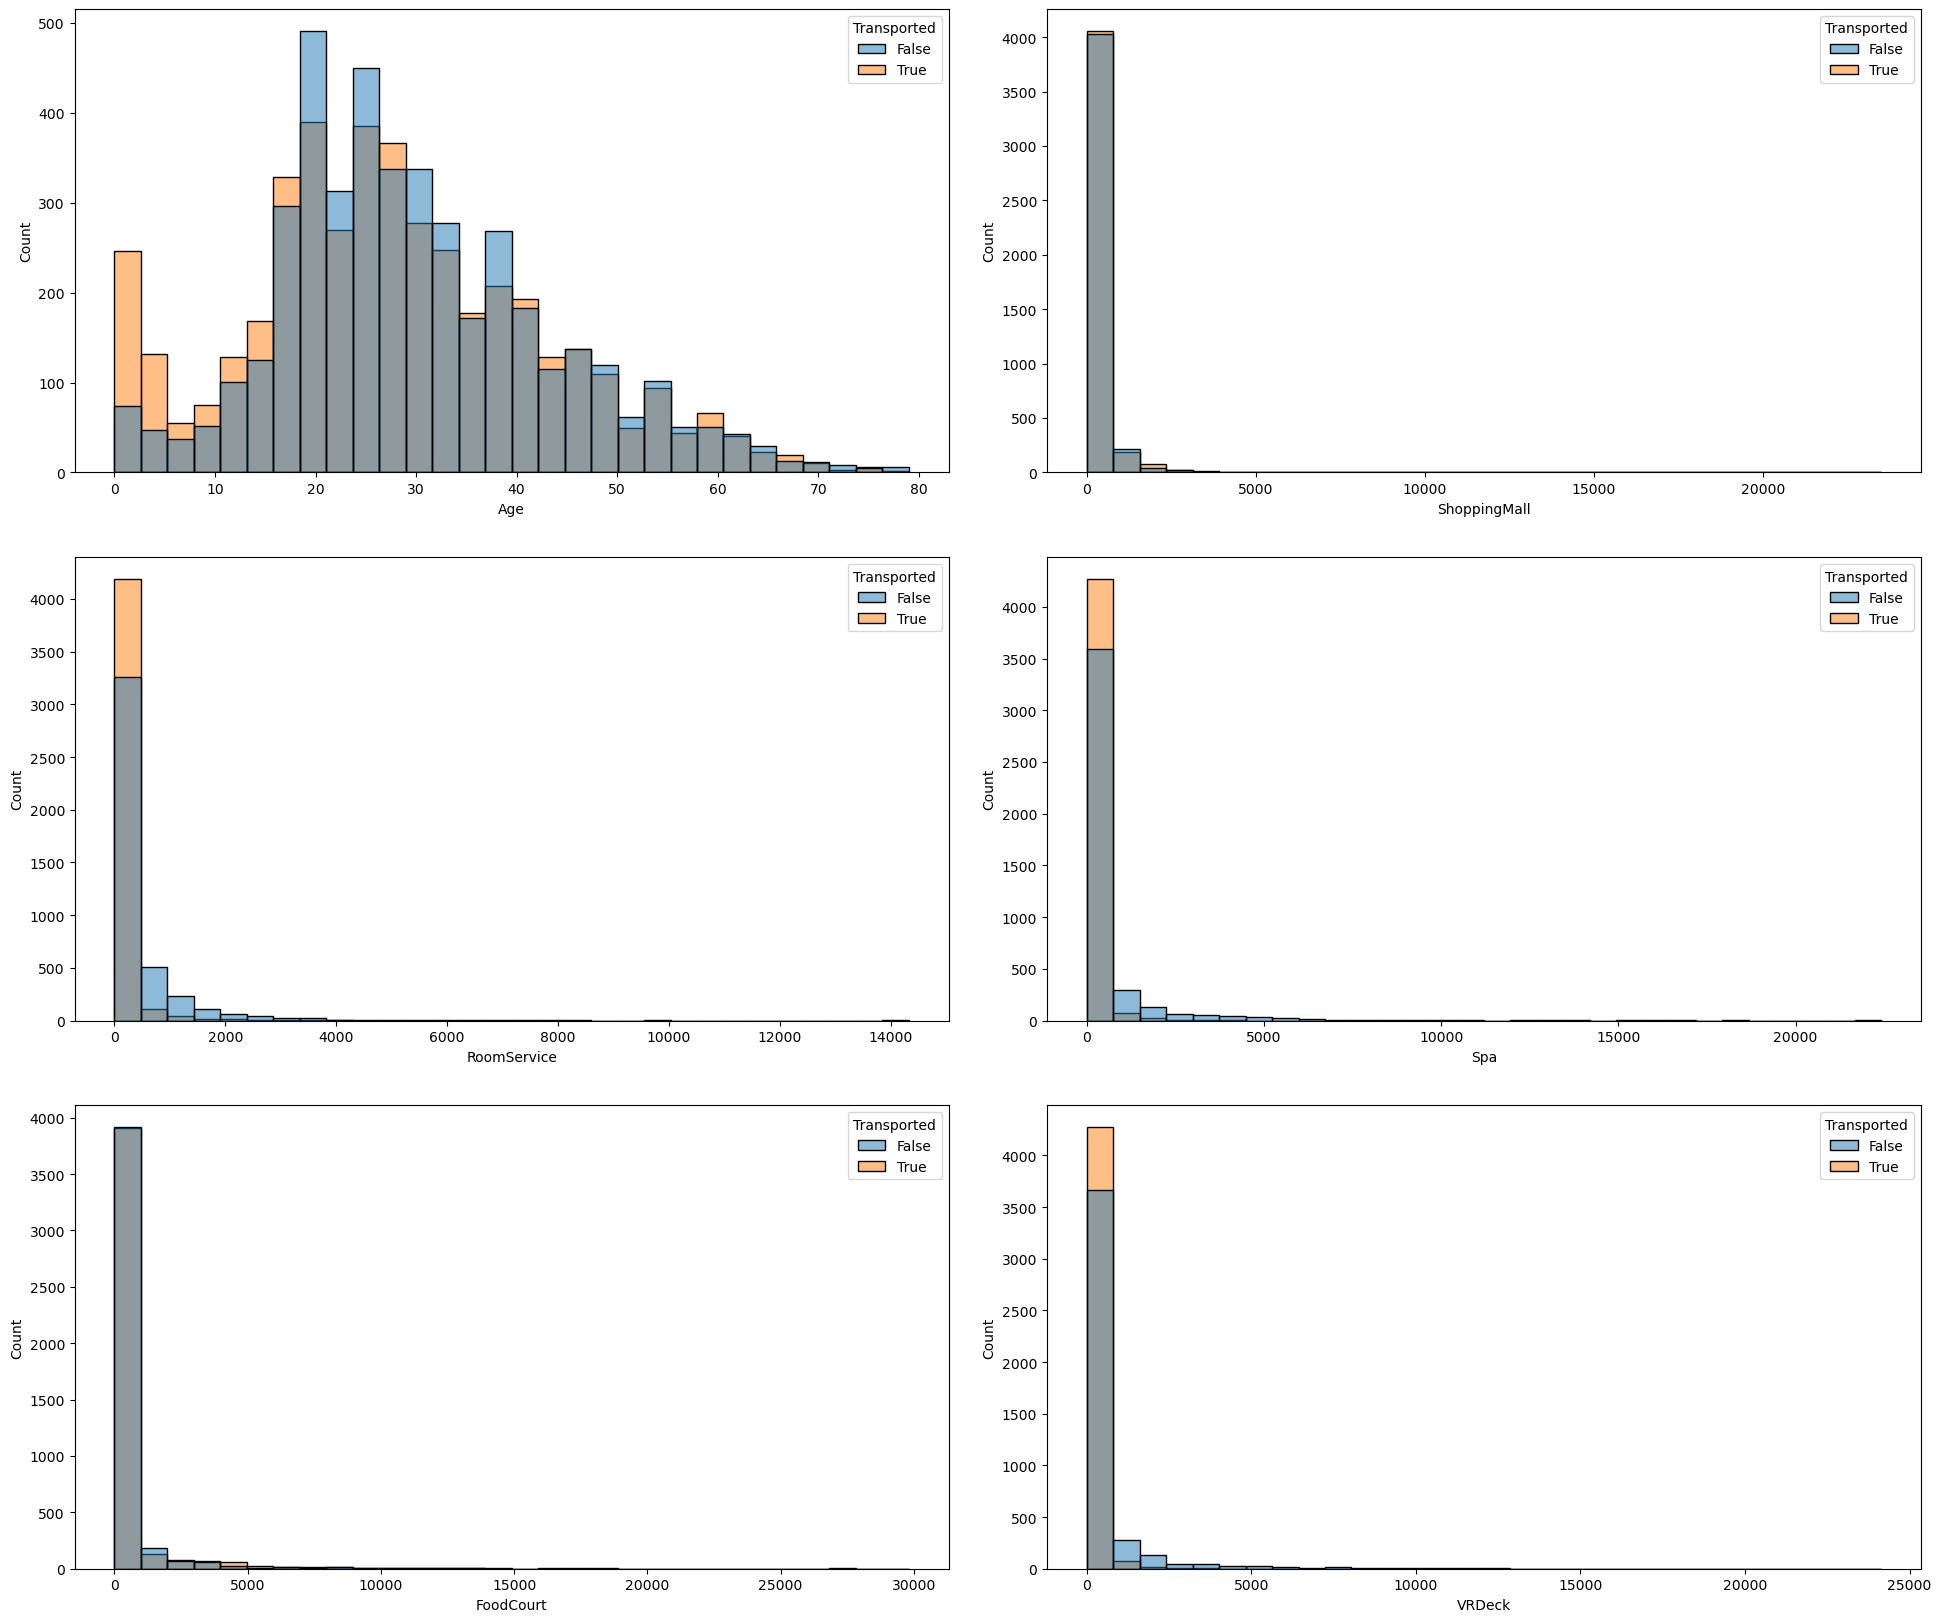

In [434]:
columns = ['Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,17))
fig.tight_layout(pad=4)
for i,col in enumerate(columns):
    sns.histplot(data=train_df[[col,'Transported']].dropna(axis=0), x=col, hue="Transported", ax=axs[i%3,i//3], bins=30)
    #pos = df[df['Transported'] == 1][col]
    #neg = df[df['Transported'] == 0][col]
    #axs[i%3,i//3].hist(pos, label="Positive")
    #axs[i%3,i//3].hist(neg, label="Negative")
    #axs[i%3,i//3].legend()
    #axs[i%3,i//3].set_title(col)

plt.show()

These graphs show the distribution of transported(True/False) by each numerical variables. Transported tends to be more common among those under 15 years of age, while non-transported tends to be more common among those 15 years of age and older. In shopping malls and foodcourts, there is not much difference in transportation characteristics by amount. However, in roomservice, spa, and VR, the proportion of transportation tends to be higher for those who DO NOT use these services. From these characteristics, it indicates that younger people (especially under 15y) and people who didn't use any services have a strong factors of being transported. 

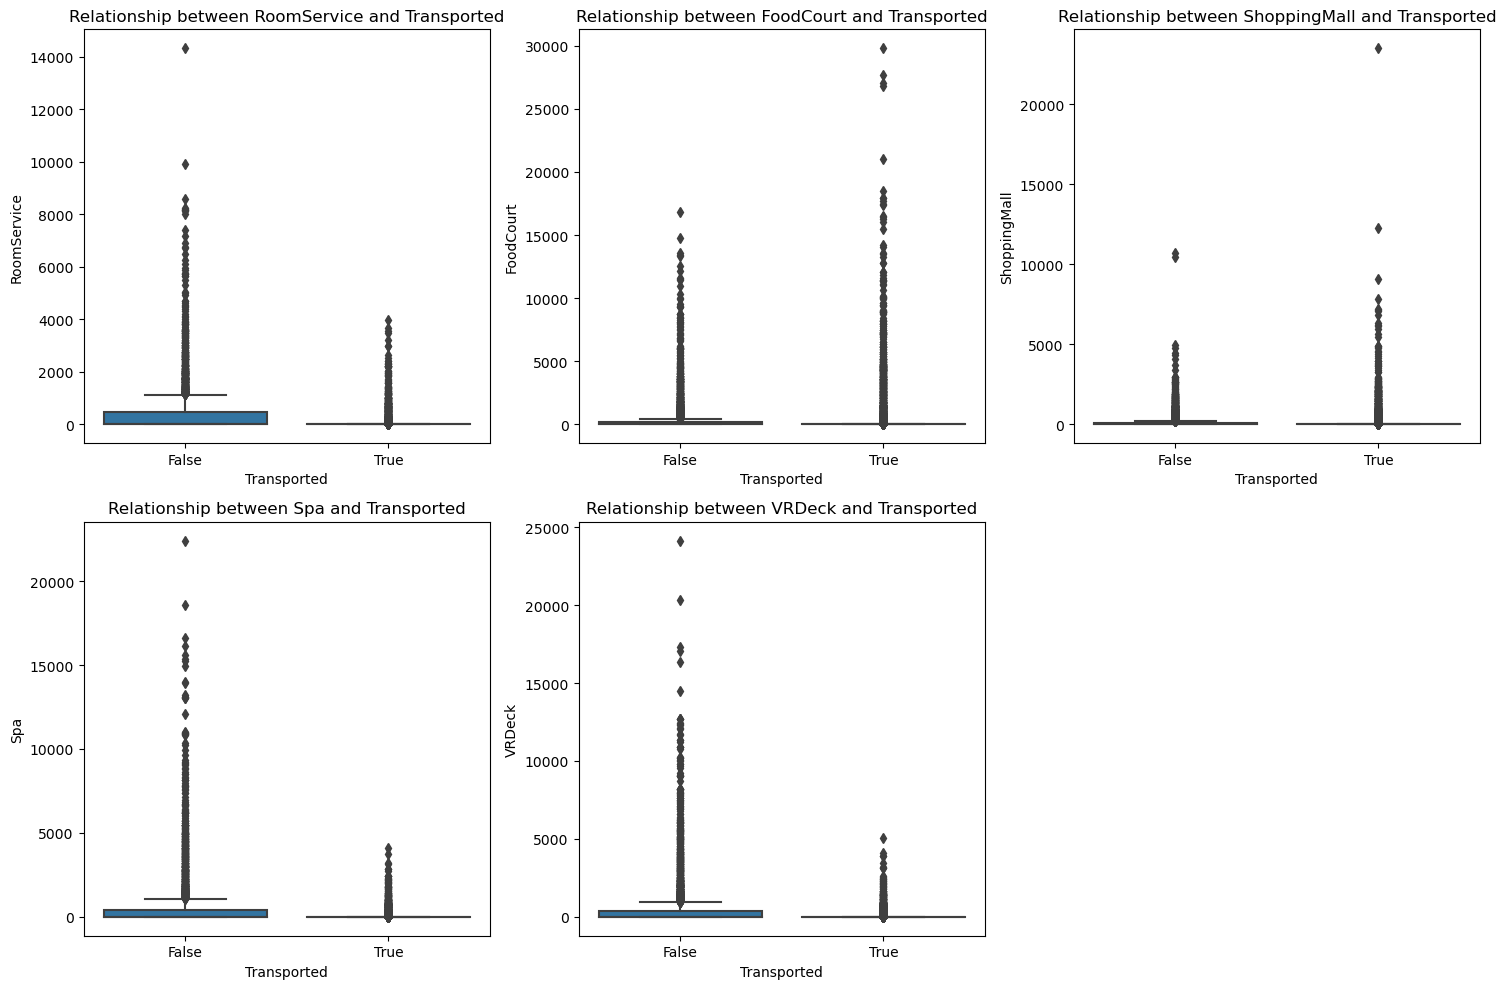

In [435]:
numerical_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Transported', y=column, data=train_df)
    plt.title(f'Relationship between {column} and Transported')

plt.tight_layout()
plt.show()

For the five services, it is difficult to evaluate the relationship with transportation in this figure because of the long-tail distribution. Removing outliers shouldn't be considered because it's not anormalities.

## 5. Feature Engineering
- Transported rate by mapping by age confirmed that children under 15 were more likely to be transported.
- The transported rate by mapping by deck confirmed that the passengers in deck B,C were more likely to be transported.
- The transported rate by mapping by cabin number confirmed that the passengers within first 300 cabins, 600-900 and 900-1,200  were more likely to be transported.
- Binary variables were applied for age, cryosleep, and service use to ascertain the transport rate for those factors in combination.

In [436]:
for dataset in combine:   
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
train_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,AgeBin
0,0001_01,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,True,False,False,False,True,True,False,"(31.6, 47.4]"
1,0002_01,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,False,False,False,False,True,True,False,"(15.8, 31.6]"
2,0003_01,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,True,False,False,False,True,True,False,"(47.4, 63.2]"
3,0003_02,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,True,False,False,False,True,True,False,"(31.6, 47.4]"
4,0004_01,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,False,False,False,False,True,True,False,"(15.8, 31.6]"


In [437]:
train_df[['AgeBin','Transported']].groupby(['AgeBin'],as_index=False).mean().sort_values(by='Transported',ascending=False)

,AgeBin,Transported
0,"(-0.079, 15.8]",0.648387
3,"(47.4, 63.2]",0.486747
2,"(31.6, 47.4]",0.485510
1,"(15.8, 31.6]",0.475495
4,"(63.2, 79.0]",0.463235


In [438]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 15, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 31), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 31) & (dataset['Age'] <= 47), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 47) & (dataset['Age'] <= 63), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 63), 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,AgeBin
0,0001_01,B/0/P,2,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,True,False,False,False,True,True,False,"(31.6, 47.4]"
1,0002_01,F/0/S,1,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,False,False,False,False,True,True,False,"(15.8, 31.6]"
2,0003_01,A/0/S,3,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,True,False,False,False,True,True,False,"(47.4, 63.2]"
3,0003_02,A/0/S,2,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,True,False,False,False,True,True,False,"(31.6, 47.4]"
4,0004_01,F/1/S,1,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,False,False,False,False,True,True,False,"(15.8, 31.6]"


Text(0.5, 1.0, 'Age')

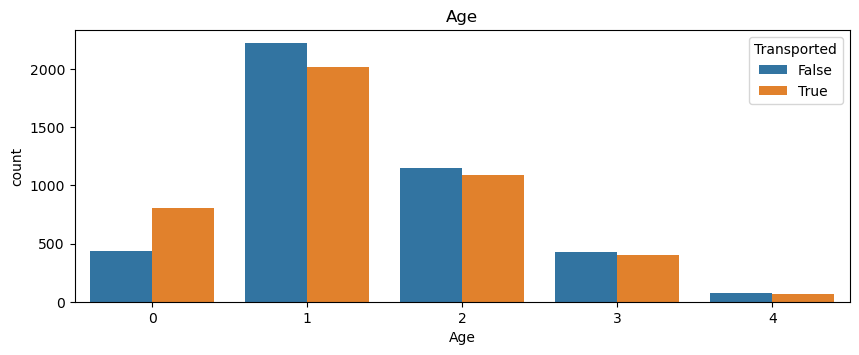

In [439]:
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train_df, x='Age', hue='Transported', order=[0,1,2,3,4])
plt.title('Age')

This more detailed visualization shows that young people (15y or younger) are considered candidates of being transported to another dimention. It is because the transported true rate is higher than false rate in people who were 15y or younger, wheareas the results were opposite in people whoe were over 15y.This result strengthens the assumption from the distribution of transported(True/False) by Age above. From this result,it might be an option to convert the numerical variables to binary variables in order to assess the relationship between transportation and these variables.

In [440]:
for dataset in combine:
    dataset['Cabin'].fillna('Z/9999/Z', inplace=True)

In [441]:
for dataset in combine:
    dataset['deck'] = dataset['Cabin'].apply(lambda x:str(x)[:1])
    dataset['num'] = dataset['Cabin'].apply(lambda x:x.split('/')[1])
    dataset['num'] = dataset['num'].astype(int)
    dataset['side'] = dataset['Cabin'].apply(lambda x:str(x)[-1:])
    dataset['deck'].fillna(dataset['deck'].mode()[0],inplace=True)
    dataset['num'].fillna(dataset['num'].mode()[0],inplace=True)
    dataset['side'].fillna(dataset['side'].mode()[0],inplace=True)

In [442]:
train_df[['deck','Transported']].groupby(['deck'],as_index=False).mean().sort_values(by='Transported',ascending=False)

,deck,Transported
1,B,0.734275
2,C,0.680054
6,G,0.516217
8,Z,0.502513
0,A,0.496094
5,F,0.439871
3,D,0.433054
4,E,0.357306
7,T,0.200000


Text(0.5, 1.0, 'Cabin deck')

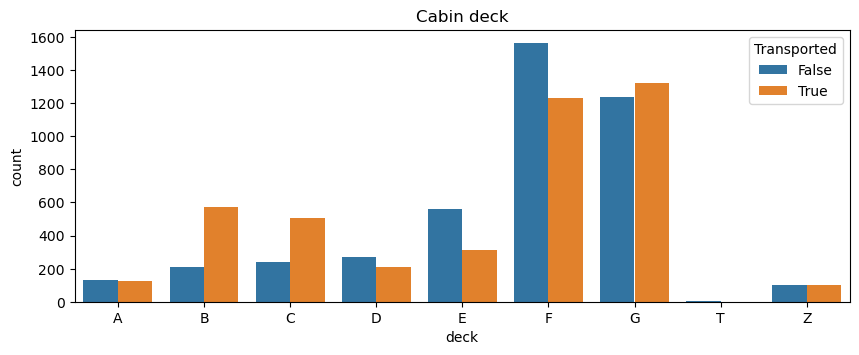

In [443]:
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train_df, x='deck', hue='Transported', order=['A','B','C','D','E','F','G','T','Z'])
plt.title('Cabin deck')

This graph shows the distribution of transported by deck. As for the total number of enrollments, F and G are significantly larger. On the other hand, as a percentage of the total number of transported passengers, passengers enrolled in B and C tend to have a high transport rate, followed by G, Z, and A. Considering the purpose of this research, examine what characteristics are likely to be transported, future analysis should be based on percentages rather than total numbers. Specifically, it is required to map the decks according to their transportation rates, and to examine the relationship between the transportation rate and each mapping.

In [444]:
deck_mapping = {"B": 1, "C": 1, "G": 2,"Z": 2, "A": 2, "F": 3, "D": 3, "E": 4, "T": 5}
for dataset in combine:
    dataset['deck'] = dataset['deck'].map(deck_mapping)

train_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,AgeBin,deck,num,side
0,0001_01,B/0/P,2,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,False,False,False,True,True,False,"(31.6, 47.4]",1,0,P
1,0002_01,F/0/S,1,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,False,False,False,True,True,False,"(15.8, 31.6]",3,0,S
2,0003_01,A/0/S,3,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,False,False,False,True,True,False,"(47.4, 63.2]",2,0,S
3,0003_02,A/0/S,2,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,False,False,False,True,True,False,"(31.6, 47.4]",2,0,S
4,0004_01,F/1/S,1,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,False,False,False,True,True,False,"(15.8, 31.6]",3,1,S


In [445]:
side_map = {'P':1,'S':0}
for dataset in combine:
    dataset['side'] = dataset['side'].map(side_map)

In [446]:
for dataset in combine:
    dataset['side'].fillna(dataset['side'].mode()[0],inplace=True)

In [447]:
train_df.isnull().sum()

PassengerId                    0
Cabin                          0
Age                            0
VIP                            0
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
Name                         200
Transported                    0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
CryoSleep_False                0
CryoSleep_True                 0
AgeBin                         0
deck                           0
num                            0
side                           0
dtype: int64

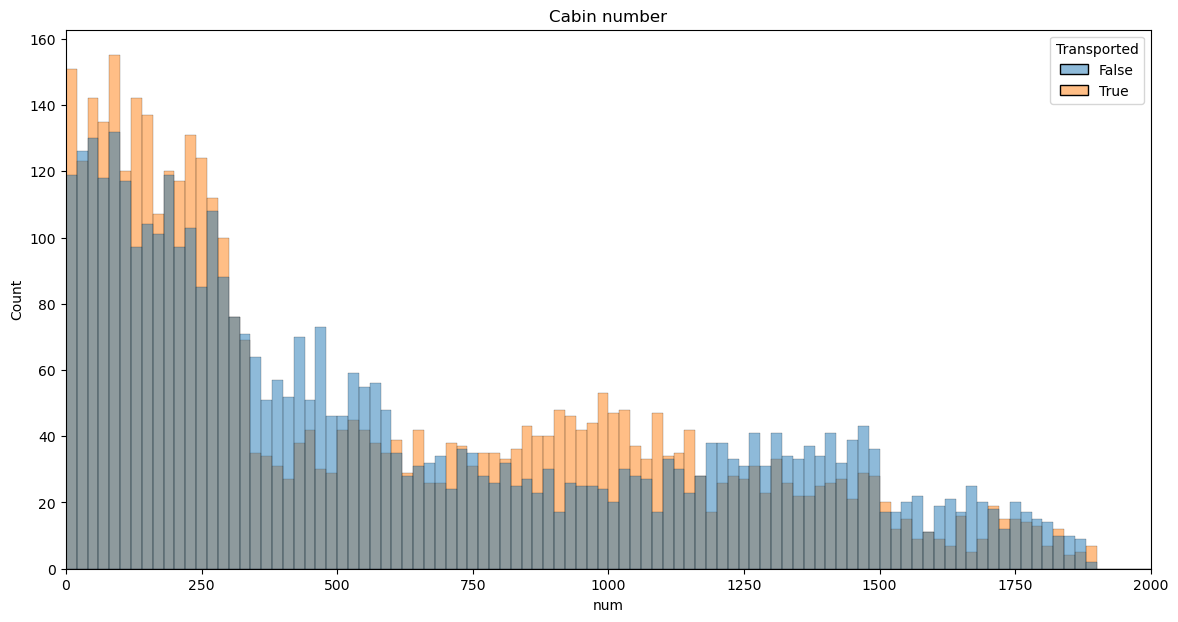

In [448]:
# Set the figure size - width, height in inches
plt.figure(figsize=(14, 7))

# Create the histogram
sns.histplot(data=train_df, x='num', hue='Transported', binwidth=20)

# Set the title and limits
plt.title('Cabin number')
plt.xlim([0, 2000])

# Display the plot
plt.show()

The Cabin Number data provides a richer narrative about the passengers aboard the spaceship and their selection for being transported to another dimention. Particularly within the first 300 cabins, 600-900 and 900-1,200, a relatively greater number of individuals were marked 'Transported' (True), suggesting a higher chance of being transported. On the other hand, within 300-600, 1,200 or more cabins, the frequency of passengers being transported were lower than transported. This trend paints a picture that those assigned to the cabin number 300-600, 1,200 or more might held a VIP status, used some services. The transport rate for each mapping and the relationship with other factors (VIP status, service status, etc.) in addition to transport should be required by mapping the cabin number according to the trend of transport rate.

In [449]:
for dataset in combine:
    dataset['region1']=(dataset['num']<300).astype(int)  
    dataset['region2']=((dataset['num']>=300)& (dataset['num']<600)).astype(int)  
    dataset['region3']=((dataset['num']>=600)& (dataset['num']<900)).astype(int)  
    dataset['region4']=((dataset['num']>=900)& (dataset['num']<1200)).astype(int)  
    dataset['region5']=((dataset['num']>=1200)& (dataset['num']<1500)).astype(int)  
    dataset['region6']=((dataset['num']>=1500)& (dataset['num']<1800)).astype(int)  
    dataset['region7']=(dataset['num']>1800).astype(int)  

In [450]:
for dataset in combine:
    dataset['group'] = dataset.PassengerId.apply(lambda x:x.split('_')[0])
    dataset['group'] = dataset['group'].astype(int)

In [451]:
train_df.head()


,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,num,side,region1,region2,region3,region4,region5,region6,region7,group
0,0001_01,B/0/P,2,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,0,1.0,1,0,0,0,0,0,0,1
1,0002_01,F/0/S,1,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0,0.0,1,0,0,0,0,0,0,2
2,0003_01,A/0/S,3,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,0,0.0,1,0,0,0,0,0,0,3
3,0003_02,A/0/S,2,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,0,0.0,1,0,0,0,0,0,0,3
4,0004_01,F/1/S,1,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,1,0.0,1,0,0,0,0,0,0,4


In [452]:
for dataset in combine:
    dataset['sum'] = dataset['VRDeck'] + dataset['Spa'] + dataset['ShoppingMall'] + dataset['RoomService'] + dataset['FoodCourt']

In [453]:
for dataset in combine:
    dataset['vr'] = dataset['VRDeck'] / dataset['sum']
    dataset['spa'] = dataset['Spa'] / dataset['sum']
    dataset['room'] = dataset['RoomService'] / dataset['sum']
    dataset['shop'] = dataset['ShoppingMall'] / dataset['sum']
    dataset['food'] = dataset['FoodCourt'] / dataset['sum']

In [454]:
for dataset in combine:
    dataset['vr'].fillna(0,inplace = True)
    dataset['spa'].fillna(0,inplace = True)
    dataset['room'].fillna(0,inplace = True)
    dataset['shop'].fillna(0,inplace = True)
    dataset['food'].fillna(0,inplace = True)

In [455]:
train_df.isnull().sum()

PassengerId                    0
Cabin                          0
Age                            0
VIP                            0
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
Name                         200
Transported                    0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
CryoSleep_False                0
CryoSleep_True                 0
AgeBin                         0
deck                           0
num                            0
side                           0
region1                        0
region2                        0
region3                        0
region4                        0
region5                        0
region6                        0
region7                        0
group     

In [456]:
train_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,region5,region6,region7,group,sum,vr,spa,room,shop,food
0,0001_01,B/0/P,2,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,0,0,0,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0002_01,F/0/S,1,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0,0,0,2,736.0,0.059783,0.745924,0.148098,0.033967,0.012228
2,0003_01,A/0/S,3,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,0,0,0,3,10383.0,0.004719,0.646730,0.004141,0.000000,0.344409
3,0003_02,A/0/S,2,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,0,0,0,3,5176.0,0.037287,0.643161,0.000000,0.071677,0.247875
4,0004_01,F/1/S,1,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,0,0,0,4,1091.0,0.001833,0.517874,0.277727,0.138405,0.064161


### Binary variables

In [457]:
# Create a binary variable that is 1 if the total expenditure is 0 and 0 otherwise
train_df['no_spending'] = (train_df['sum'] == 0).astype(int)

train_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,region6,region7,group,sum,vr,spa,room,shop,food,no_spending
0,0001_01,B/0/P,2,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,0,0,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,0002_01,F/0/S,1,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0,0,2,736.0,0.059783,0.745924,0.148098,0.033967,0.012228,0
2,0003_01,A/0/S,3,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,0,0,3,10383.0,0.004719,0.646730,0.004141,0.000000,0.344409,0
3,0003_02,A/0/S,2,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,0,0,3,5176.0,0.037287,0.643161,0.000000,0.071677,0.247875,0
4,0004_01,F/1/S,1,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,0,0,4,1091.0,0.001833,0.517874,0.277727,0.138405,0.064161,0


In [458]:
# Create a binary variable that is 1 if they are 1; otherwise, to 0
train_df['deck_BC'] = (train_df['deck'] == 1) .astype(int)

train_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,region7,group,sum,vr,spa,room,shop,food,no_spending,deck_BC
0,0001_01,B/0/P,2,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,0,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,1
1,0002_01,F/0/S,1,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0,2,736.0,0.059783,0.745924,0.148098,0.033967,0.012228,0,0
2,0003_01,A/0/S,3,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,0,3,10383.0,0.004719,0.646730,0.004141,0.000000,0.344409,0,0
3,0003_02,A/0/S,2,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,0,3,5176.0,0.037287,0.643161,0.000000,0.071677,0.247875,0,0
4,0004_01,F/1/S,1,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,0,4,1091.0,0.001833,0.517874,0.277727,0.138405,0.064161,0,0


In [459]:
# Created binary variables for age
train_df['AgeBinary'] = train_df['Age'].apply(lambda x: 0 if x in [1, 2, 3, 4] else 1)
train_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,group,sum,vr,spa,room,shop,food,no_spending,deck_BC,AgeBinary
0,0001_01,B/0/P,2,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0
1,0002_01,F/0/S,1,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,2,736.0,0.059783,0.745924,0.148098,0.033967,0.012228,0,0,0
2,0003_01,A/0/S,3,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,3,10383.0,0.004719,0.646730,0.004141,0.000000,0.344409,0,0,0
3,0003_02,A/0/S,2,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,3,5176.0,0.037287,0.643161,0.000000,0.071677,0.247875,0,0,0
4,0004_01,F/1/S,1,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,4,1091.0,0.001833,0.517874,0.277727,0.138405,0.064161,0,0,0


In [460]:
# First, create a new column with 'Others' as the default value
train_df['NoSpending_CryoSleep'] = 'Others'

# Then, update the value to 'No Spending and CryoSleep' where the condition is met
condition = (train_df['no_spending'] == 1) & (train_df['CryoSleep_True'] == True)
train_df.loc[condition, 'NoSpending_CryoSleep'] = 'No Spending and CryoSleep'

# Now create a pivot table based on this new column
table = pd.pivot_table(
    train_df,
    values='PassengerId',
    index='NoSpending_CryoSleep',
    columns='Transported',
    aggfunc='count'
)

# Fill NaN values with 0 for accurate division
table = table.fillna(0)

# Calculate the percentage of 'Transported'
table['Transported Rate'] = table[True] / (table[True] + table[False])

# Format the 'Transported Rate' as a percentage
formatted_table = table.style.format({
    'Transported Rate': '{:.2%}'
})

# Display the result
display(formatted_table)

Transported,False,True,Transported Rate
NoSpending_CryoSleep,,,
No Spending and CryoSleep,554,2483,81.76%
Others,3761,1895,33.50%


In [461]:
# First, create a new column with 'Others' as the default value
train_df['Deck_Europa'] = 'Others'

# Then, update the value to 'deck_BC and HomePlanet_Europa' where the condition is met
condition = (train_df['deck_BC'] == 1) & (train_df['HomePlanet_Europa'] == True)
train_df.loc[condition, 'Deck_Europa'] = 'Deck BC and Europa'

# Create a pivot table based on the new column
table = pd.pivot_table(
    train_df,
    values='PassengerId',
    index='Deck_Europa',
    columns='Transported',
    aggfunc='count'
)

# Calculate the percentage of 'Transported'
table['Transported Rate'] = table[True] / (table[True] + table[False])

# Rename index for clarity
table.index = ['Deck BC and Europa', 'Others']

# Format the 'Transported Rate' as a percentage
formatted_table = table.style.format({
    'Transported Rate': '{:.2%}'
})

# Display the result
formatted_table

Transported,False,True,Transported Rate
Deck BC and Europa,441,1059,70.60%
Others,3874,3319,46.14%


In [462]:
# First, create a new column with 'Others' as the default value
train_df['Young_No_spending'] = 'Others'

# Then, update the value to 'Young and No_spending' where the condition is met
condition = (train_df['AgeBinary'] == 1) & (train_df['no_spending'] == 1)
train_df.loc[condition, 'Young_No_spending'] = 'Young and No Spending'

# Create a pivot table based on the new column
table = pd.pivot_table(
    train_df,
    values='PassengerId',
    index='Young_No_spending',
    columns='Transported',
    aggfunc='count'
)

# Calculate the percentage of 'Transported'
table['Transported Rate'] = table[True] / (table[True] + table[False])

# Rename index for clarity
table.index = ['Others', 'Young_No_spending']

# Format the 'Transported Rate' as a percentage
formatted_table = table.style.format({
    'Transported Rate': '{:.2%}'
})

# Display the result
formatted_table

Transported,False,True,Transported Rate
Others,4039,3628,47.32%
Young_No_spending,276,750,73.10%


Based on the previous analysis, the factors that seemed to have a strong relationship with transported were passengers not using the service, passengers who were cryosleeping, passengers in deck B and C, passengers from Europa, and children under 15 years old. In addition, the following three combinations of factors would be more likely to be transported in light of the relationships among each factor.
- 1) passengers who did not use the service and who were in cryo-sleep : as a matter of course, passengers in cryo-sleep are not allowed to use the service, so this passenger is considered to be overlapped. The transport rate for this passenger is 81.76% compared to the rate for passengers who are not (33.50%).
- 2) Passengers assigned to decks B and C and from Europa : A high percentage of both passengers in decks B and C and passengers from Europa are transported; if assignments to decks are separated by homeplanet, these passengers are likely to be overlapped. The transport rate for these passengers is higher (70.60%) compared to the rate for those who do not (46.16%).
- 3) Children under 15 years old and passengers not using the service : This factor is also likely to overlap, given that 15 year olds rarely use the service themselves. The transport rate for these passengers is higher (73.10%) compared to the rate for passengers who do not (73.10%).

## 6. Preprocessing
- Performing a correlation analysis, it was found that transported showed strong correlations with passengers not using the service, passengers in cryosleep, passengers on Decks B and C, passengers from Europa, and children under 15 years of age.

In [463]:
passenger_id_train = train_df['PassengerId']
passenger_id_test = test_df['PassengerId']

In [464]:
train_df = train_df.drop(['Name', 'PassengerId','AgeBin','Cabin','num','NoSpending_CryoSleep', 'Deck_Europa', 'Young_No_spending'], axis=1)
test_df = test_df.drop(['Name', 'PassengerId','AgeBin','Cabin','num'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((8693, 35), (4277, 31))

In [465]:
train_df.columns.values

array(['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'CryoSleep_False', 'CryoSleep_True', 'deck', 'side', 'region1',
       'region2', 'region3', 'region4', 'region5', 'region6', 'region7',
       'group', 'sum', 'vr', 'spa', 'room', 'shop', 'food', 'no_spending',
       'deck_BC', 'AgeBinary'], dtype=object)

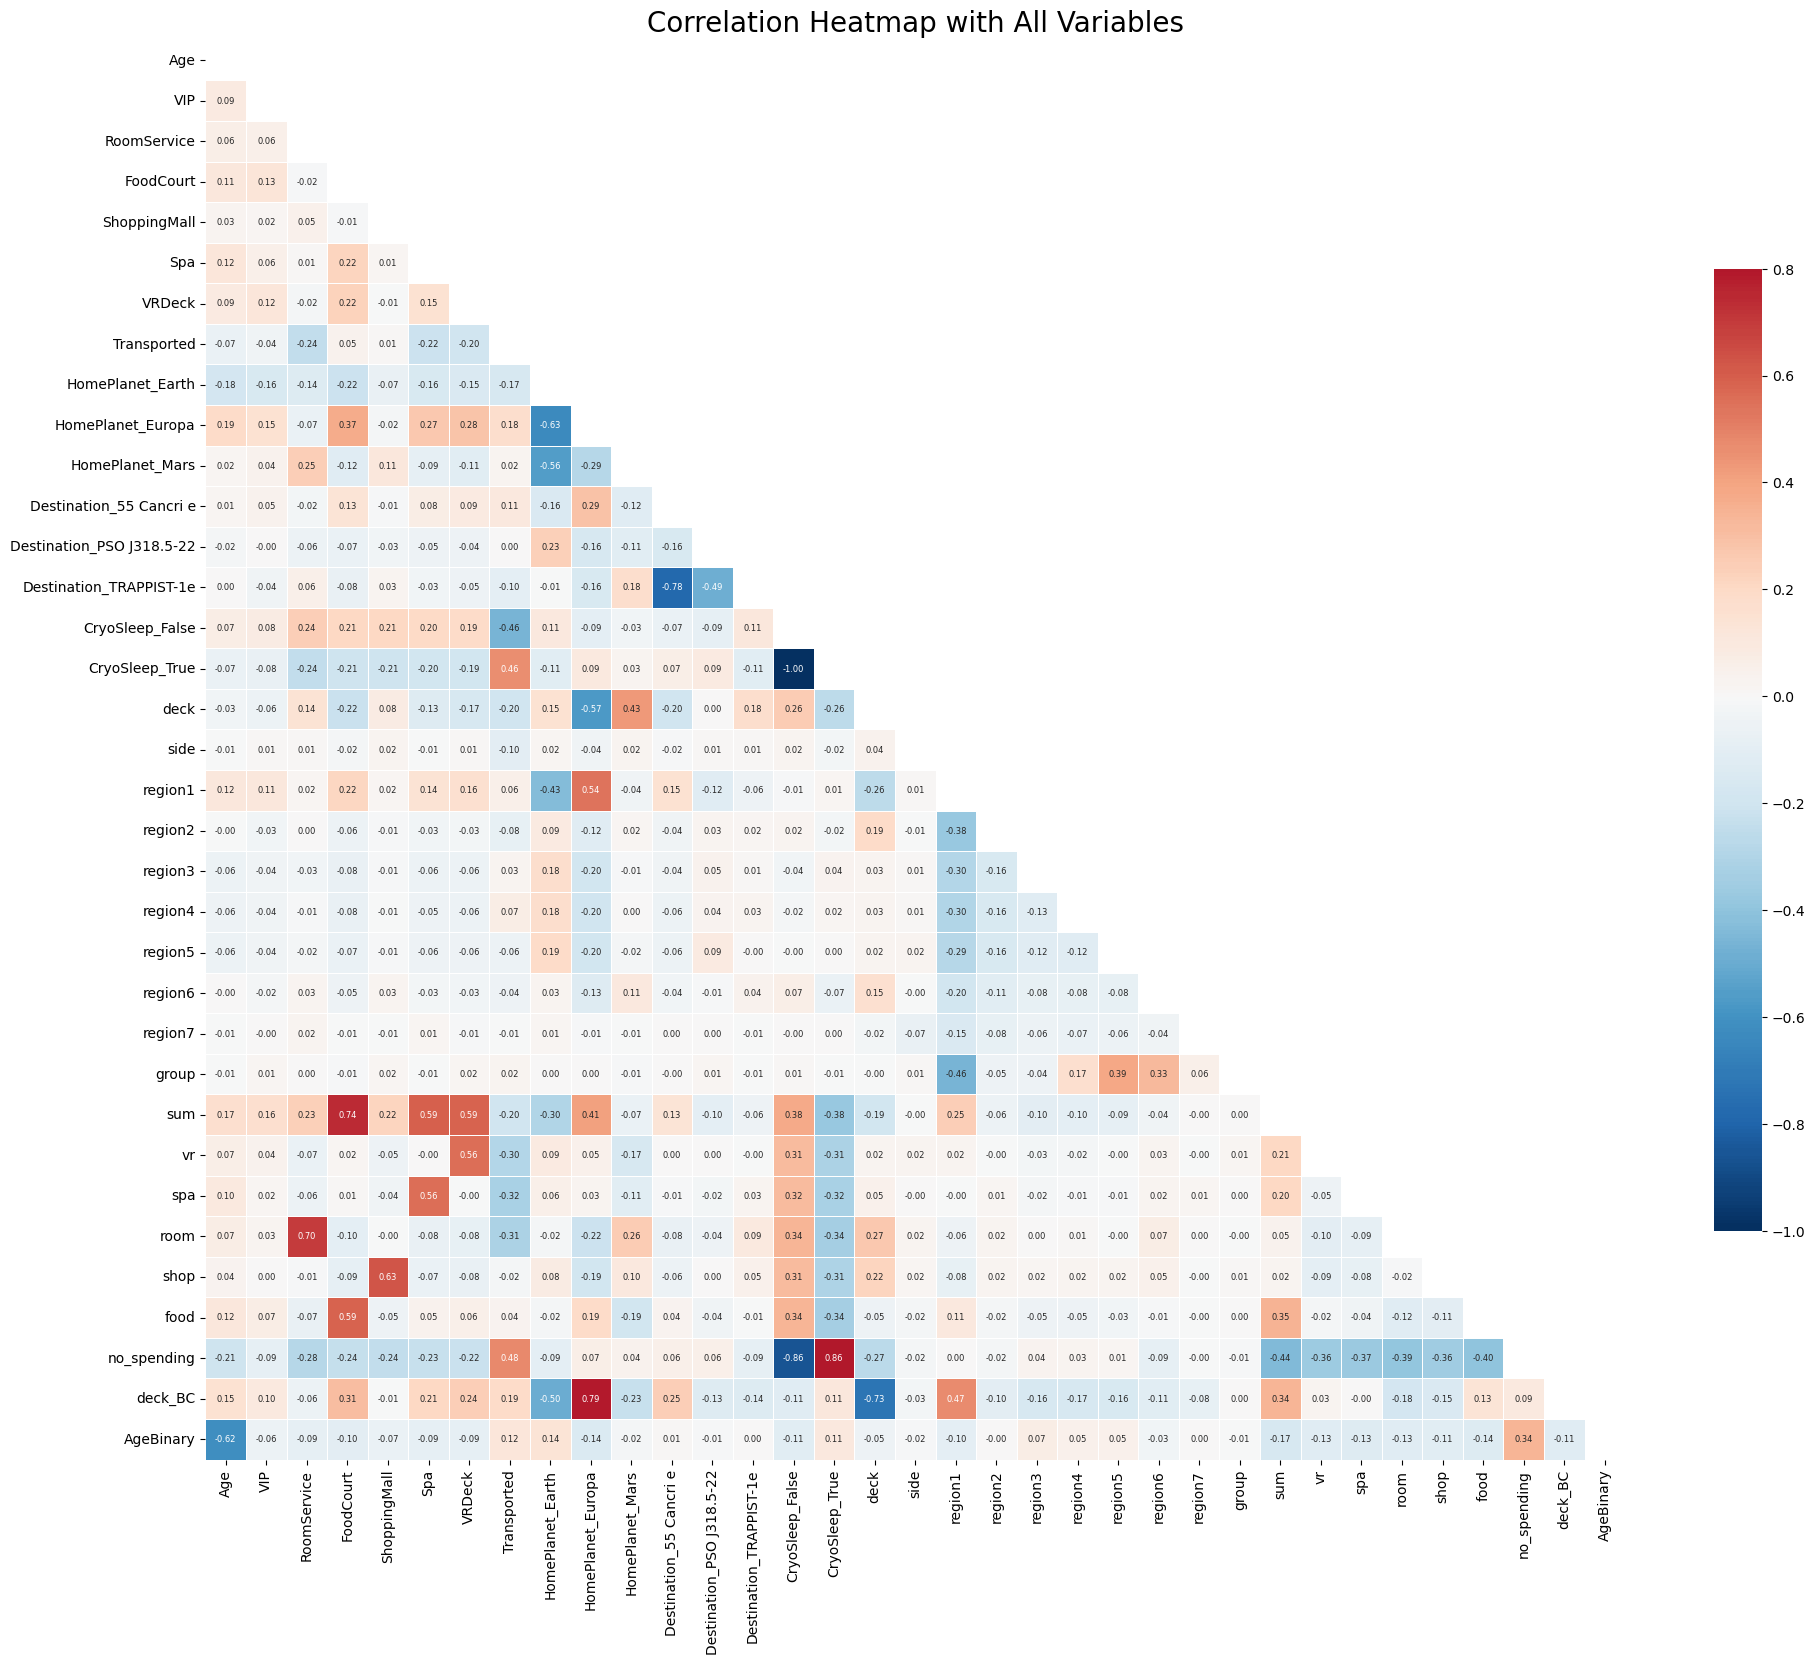

In [466]:
# Convert categorical variables to dummies/numerical if not already done
train_df_numerical = pd.get_dummies(train_df)

# Calculate the correlation matrix
corrmat = train_df_numerical.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))  # Adjust the size as needed

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, mask=mask, cmap='RdBu_r', vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt=".2f", annot_kws={"size": 6})  # Decrease annotation size if necessary

# Rotate x-axis tick labels if they are overlapping
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)

plt.title('Correlation Heatmap with All Variables', fontsize=20)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

The highest correlation with Transported was passengers not using the service (Spending Status_No_Spending: 0.48), followed by passengers in cryosleep (CryoSleep_True: 0.46), passengers in decks B and C (Deck_deck_ BC: 0.19), passengers from Europa (HomePlanet_Europa: 0.18), and children under 15 (Age_children(<= 15): 0.12). In light of the relationship between each of the factors, the correlation between passengers not using the service and those who are cryosleeping is 0.86, the correlation between passengers in decks B and C and those from Europa is 0.79, and the correlation between children under 15 and those not using the service is 0.34, which are relatively higher than other correlation coefficient. These facts support the above analysis and suggest that the hypothesized direction of the previous combination was not generally wrong.

In [467]:
train_df = train_df.drop(['no_spending','deck_BC', 'AgeBinary'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((8693, 32), (4277, 31))

In [468]:
X_train = train_df.drop("Transported", axis=1)
Y_train = train_df["Transported"]
X_test  = test_df.copy()
X_train.shape, Y_train.shape, X_test.shape

((8693, 31), (8693,), (4277, 31))

## 7. Models
- Eight models were evaluated, and the model using the GradientBoostingClassifier showed the highest accuracy at 79.4%.

### Logistic Regression

In [469]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\fujih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


78.81

In [470]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Coefficient"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
14,CryoSleep_True,0.496271
8,HomePlanet_Europa,0.364319
17,region1,0.323685
0,VIP,0.228370
10,Destination_55 Cancri e,0.200268
9,HomePlanet_Mars,0.131137
20,region4,0.074611
19,region3,0.039762
12,Destination_TRAPPIST-1e,0.011302
1,RoomService,0.004955


A logistic regression model is instantiated and fitted with training data.The accuracy of the model on the training data is calculated to be approximately 78.81%, which is a measure of how well the model predicts the training data. The coefficients from the logistic regression model are extracted into a DataFrame to understand the influence of each feature. Positive coefficients indicate a feature that correlates with an increased likelihood of the target variable, while negative coefficients indicate a feature that correlates with a decreased likelihood.

The feature 'CryoSleep_True' has the highest positive coefficient, suggesting that being in cryosleep is strongly associated with the outcome. In contrast, the feature 'HomePlanet_Earth' has a significant negative coefficient, indicating that coming from Earth is negatively associated with the outcome. These coefficients help in understanding the relationships between the features and the prediction target, and in this context, they may be indicating the importance of features in determining whether a passenger is transported or not.

### Linear Regression

In [471]:
from sklearn.linear_model import LinearRegression

# Create an instance of a linear regression model
linear_reg = LinearRegression()

# Fit model to training data
linear_reg.fit(X_train, Y_train)

# Make predictions for test data
Y_pred_linear = linear_reg.predict(X_test)

# Calculate accuracy for training data
acc_linear_reg = round(linear_reg.score(X_train, Y_train) * 100, 2)

# Show results
print(f"Linear Regression accuracy: {acc_linear_reg}%")


Linear Regression accuracy: 41.82%


### Linear SVC

In [472]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\fujih\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


61.43

### Decision Tree

In [473]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

99.45

### Random Forest

In [474]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.45

### Support Vector Machine Model

In [475]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.65

###  Model evaluation

In [476]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines','Logistic Regression', 
              'Random Forest', 'Linear SVC', 'Decision Tree'],
    'Score': [acc_svc, acc_log, acc_random_forest, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,99.45
4,Decision Tree,99.45
1,Logistic Regression,78.81
0,Support Vector Machines,78.65
3,Linear SVC,61.43


The models evaluated include Support Vector Machines (SVM), Logistic Regression, Linear SVC, Decision Tree, and Random Forest. Each model's accuracy score is listed, with Random Forest and Decision Tree models both achieving the highest score of 99.45%. Logistic Regression follows with a score of 78.81%, and Support Vector Machines have a score of 78.65%. Linear SVC appears to perform the worst with a score of 69.33%.

These scores suggest that tree-based models (Random Forest and Decision Tree) performed significantly better than the others for this particular dataset. High accuracy in tree-based models may indicate that the features have complex interactions that these models can capture better than linear models like Logistic Regression and Linear SVC. However, such high scores could also be a sign of overfitting, where the model learns the training data too well, including the noise, which may not generalize well to unseen data.

### ensemble.GradientBoostingClassifier

In [477]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Split the data into training and validation sets
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Train the model
gb_clf.fit(X_train_split, Y_train_split)

# Make predictions on the validation data
Y_val_pred = gb_clf.predict(X_val_split)

# Evaluate the Validation Accuracy
val_accuracy = accuracy_score(Y_val_split, Y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')

Validation Accuracy: 0.7935595169637722


### Score For submission

In [478]:
#Make predictions on the test data using the trained model
Y_test_pred = gb_clf.predict(X_test)

# Add the predictions as a new column named 'Transported' in test_df
# Convert numeric predictions back to boolean if necessary (assuming 1=True, 0=False)
test_df['Transported'] = Y_test_pred.astype(bool)

In [479]:
# Export file as csv
sample_submission_df = pd.read_csv(datapath / Path('sample_submission.csv'))

submission = pd.DataFrame({
        "PassengerId": sample_submission_df["PassengerId"],
        "Transported": test_df['Transported']
    })

submission.to_csv('GBC_AV_4B_ADD.csv', index=False)

## 8. Actionable Insights

Three passenger characteristics were identified as the transported passenger profile, and passengers who met at least one of the three characteristics accounted for 71.2% of the transported passengers.

(1)	Passengers who were in cryosleep and did not use the service.
The correlation coefficients between “Transported” and passengers who were in cryosleep and did not use services were 0.48 and 0.46, which were the highest compared to the other variables, and the correlation coefficient of 0.86 was also found for passengers who were in cryosleep and not using services, suggesting they were more likely to be carried (80% (2,483/3,087 passengers)). The number of applicable passengers was 2,483, or 56.7% of the total number of transported passengers(4,378), accounting for more than half of the total number of passengers.

(2)	The number of passengers who were in deck B,C and from Europa 
The correlation coefficients between Transported and Deck B,C and Homeplanet_Europa were 0.19 and 0.18, which were the second highest compered to cryosleep and passengers who did not use the service, and the correlation coefficient between deck B, C and Homeplanet_Europa was also 0.79, suggesting that deck B, C and Homeplanet_Europa passengers are more likely to be carried (70.6% (1,059/1,500)). The number of applicable passengers was 1,059, accounting for 24.2% of all passengers carried (4,378).

(3)	Children (15 y or younger) and passengers who did not use the service.
The correlation coefficient between Transported and children (15 y or younger) was 0.12, which was the second highest compared to deck B,C and Homeplanet_Europa passengers, and the correlation coefficient between children (15 y or younger) and passengers who did not use the service was also relatively high at 0.35, suggesting that passengers who are children (15 y or younger) and not using the service are more likely to be carried (73.1% (750/1,026 passengers)). The number of applicable passengers was 681, or 15.6% of all passengers carried (4,378).

## 9. Conclusion

・This data analysis reveals the factors that cause passengers to be transported to another planet. Passenger social status, cabin location, cryo-sleep status, and non-service use play important roles.<br> 

・In particular, we found that passengers who are in cryo-sleep and do not use the service, passengers who stay on decks B or C and are from Europe, and passengers who are under 15 years old and do not use the service are more likely to be transported.<br>

・Model evaluation showed that Random Forest and Decision Tree achieved a high accuracy of 99.45%, with tree-based models in particular outperforming other models on this dataset. These results demonstrate the importance of the model's ability to capture complex interactions in the data, and the data we trained on was able to adapt to unknown data without overfitting. In fact, we found that our model is stable with low error.

・The results of this analysis can also help improve safety when passengers travel in groups, optimize cabin layout and evacuation routes, and provide fair safety measures for all passengers to avoid such problems. 

## 10. Bibliography

Bishop, C. M. (2007). Pattern recognition and machine learning (Corr. print, Ser. Information science and statistics). Springer.

Müller, A. C., & Guido, S. (2017). Introduction to machine learning with python : a guide for data scientists (First). O’Reilly Media. 2024,

Nordhausen, K. (2009). The elements of statistical learning: data mining, inference, and prediction, second edition by trevor hastie, robert tibshirani, jerome friedman. International Statistical Review, 77(3), 482–482. https://doi.org/10.1111/j.1751-5823.2009.00095_18.x